## First time setup run the code for google colab

In [ ]:
# Google Colab Setup
try:
    from google.colab import drive
    drive.mount('/content/drive')
    import os
    
    # Path to the project root in Google Drive
    # MODIFY THIS PATH IF YOU STORED THE PROJECT ELSEWHERE
    project_root = '/content/drive/MyDrive/ComputerVisionTest'
    
    if os.path.exists(project_root):
        # Change to project root to install requirements
        os.chdir(project_root)
        print("Installing requirements...")
        !pip install -q -r requirements.txt
        
        # Download dataset
        print("Downloading Flowers102 dataset...")
        from torchvision.datasets import Flowers102
        import sys
        # Ensure src is in path for imports if needed, though we use standard torchvision here
        
        # Define data root
        data_root = os.path.join(project_root, 'src', 'data')
        os.makedirs(data_root, exist_ok=True)
        
        # Trigger downloads for all splits
        Flowers102(root=data_root, split='train', download=True)
        Flowers102(root=data_root, split='val', download=True)
        Flowers102(root=data_root, split='test', download=True)
        print("Dataset downloaded.")
        
        # Change directory to 'notebooks' so relative paths in subsequent cells work
        notebooks_dir = os.path.join(project_root, 'notebooks')
        if os.path.exists(notebooks_dir):
            os.chdir(notebooks_dir)
            print(f"Changed directory to {notebooks_dir}")
    else:
        print(f"Warning: Project root {project_root} not found. Please check your Drive path.")
        
except ImportError:
    print("Not running in Google Colab")

## First time setup run the code for local machine

In [1]:
# Local Machine Setup
# Use this when running locally
try:
    import os
    import sys
    from torchvision.datasets import Flowers102
    
    # Get the path to the project root (assuming running from notebooks/)
    current_dir = os.getcwd()
    if current_dir.endswith('notebooks'):
        project_root = os.path.abspath('..')
    else:
        # Assume we are at root or close to it
        project_root = os.path.abspath('.')
    
    if os.path.exists(os.path.join(project_root, 'src')):
        print(f"Project root set to: {project_root}")
        # Add project root to sys.path so we can import from src
        if project_root not in sys.path:
            sys.path.append(project_root)
            print("Added project root to sys.path")
        
        # Define data root
        data_root = os.path.join(project_root, 'src', 'data')
        os.makedirs(data_root, exist_ok=True)
        
        # Check/Download dataset
        print("Checking dataset...")
        Flowers102(root=data_root, split='train', download=True)
        Flowers102(root=data_root, split='val', download=True)
        Flowers102(root=data_root, split='test', download=True)
        print("Dataset ready.")
    else:
        print("Warning: Could not find 'src' directory. Ensure you are in the correct project structure.")
except Exception as e:
    print(f"Local setup failed: {e}")

Project root set to: f:\ComputerVisionTest
Added project root to sys.path
Checking dataset...
Dataset ready.


# Part 1 : Exploratory Data Analysis (EDA)

This notebook explores the Oxford 102 Flowers dataset, visualizing class distributions, sample images, and basic statistics.

In [ ]:
# --- Inlined src/data/exploration.py ---

import matplotlib.pyplot as plt
import numpy as np
import torch
from collections import Counter

def plot_class_distribution(dataset, title="Class Distribution"):
    """
    Plots the distribution of classes in the dataset.
    """
    labels = [y for _, y in dataset]
    counts = Counter(labels)
    
    plt.figure(figsize=(15, 6))
    plt.bar(counts.keys(), counts.values())
    plt.title(title)
    plt.xlabel("Class ID")
    plt.ylabel("Count")
    plt.show()

def show_samples(dataset, num_samples=9, cols=3):
    """
    Displays a grid of sample images from the dataset.
    """
    indices = np.random.choice(len(dataset), num_samples, replace=False)
    
    rows = (num_samples + cols - 1) // cols
    plt.figure(figsize=(15, 5 * rows))
    
    for i, idx in enumerate(indices):
        image, label = dataset[idx]
        plt.subplot(rows, cols, i + 1)
        plt.imshow(image)
        plt.title(f"Class: {label}")
        plt.axis('off')
    plt.show()

def calculate_stats(dataset):
    """
    Calculates the mean and standard deviation of the dataset.
    Note: This can be slow for large datasets.
    """
    loader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=False)
    
    mean = 0.0
    std = 0.0
    total_images_count = 0
    
    for images, _ in loader:
        # Assuming images are already tensors (0-1)
        batch_samples = images.size(0)
        images = images.view(batch_samples, images.size(1), -1)
        mean += images.mean(2).sum(0)
        std += images.std(2).sum(0)
        total_images_count += batch_samples

    mean /= total_images_count
    std /= total_images_count

    return mean, std


In [2]:
import sys
import os
sys.path.append(os.path.abspath('../'))  # Add src to path

from torchvision.datasets import Flowers102
import matplotlib.pyplot as plt
# from src.data.exploration import plot_class_distribution, show_samples
import torch

%matplotlib inline

## Load Dataset
We load the training split of the Flowers102 dataset without transforms for visualization purposes.

In [3]:
# Download and load dataset (no transforms for EDA)
dataset = Flowers102(root='../src/data', split='train', download=True)

## Class Distribution
Let's see how many images we have per class in the training set.

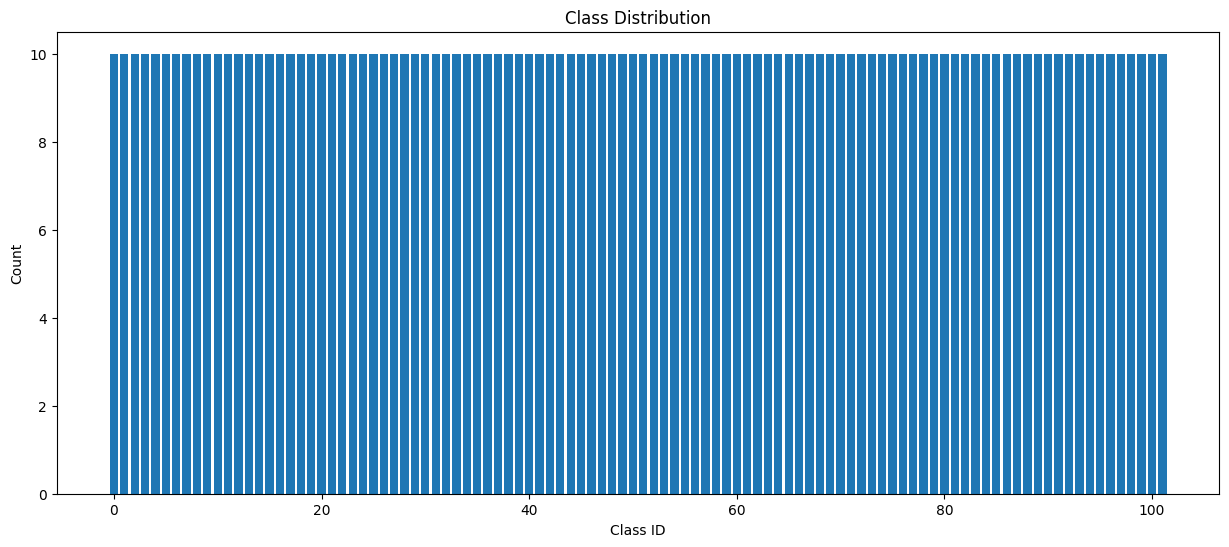

In [4]:
plot_class_distribution(dataset)

## Sample Images
Visualizing random samples to understand the variety and quality of images.

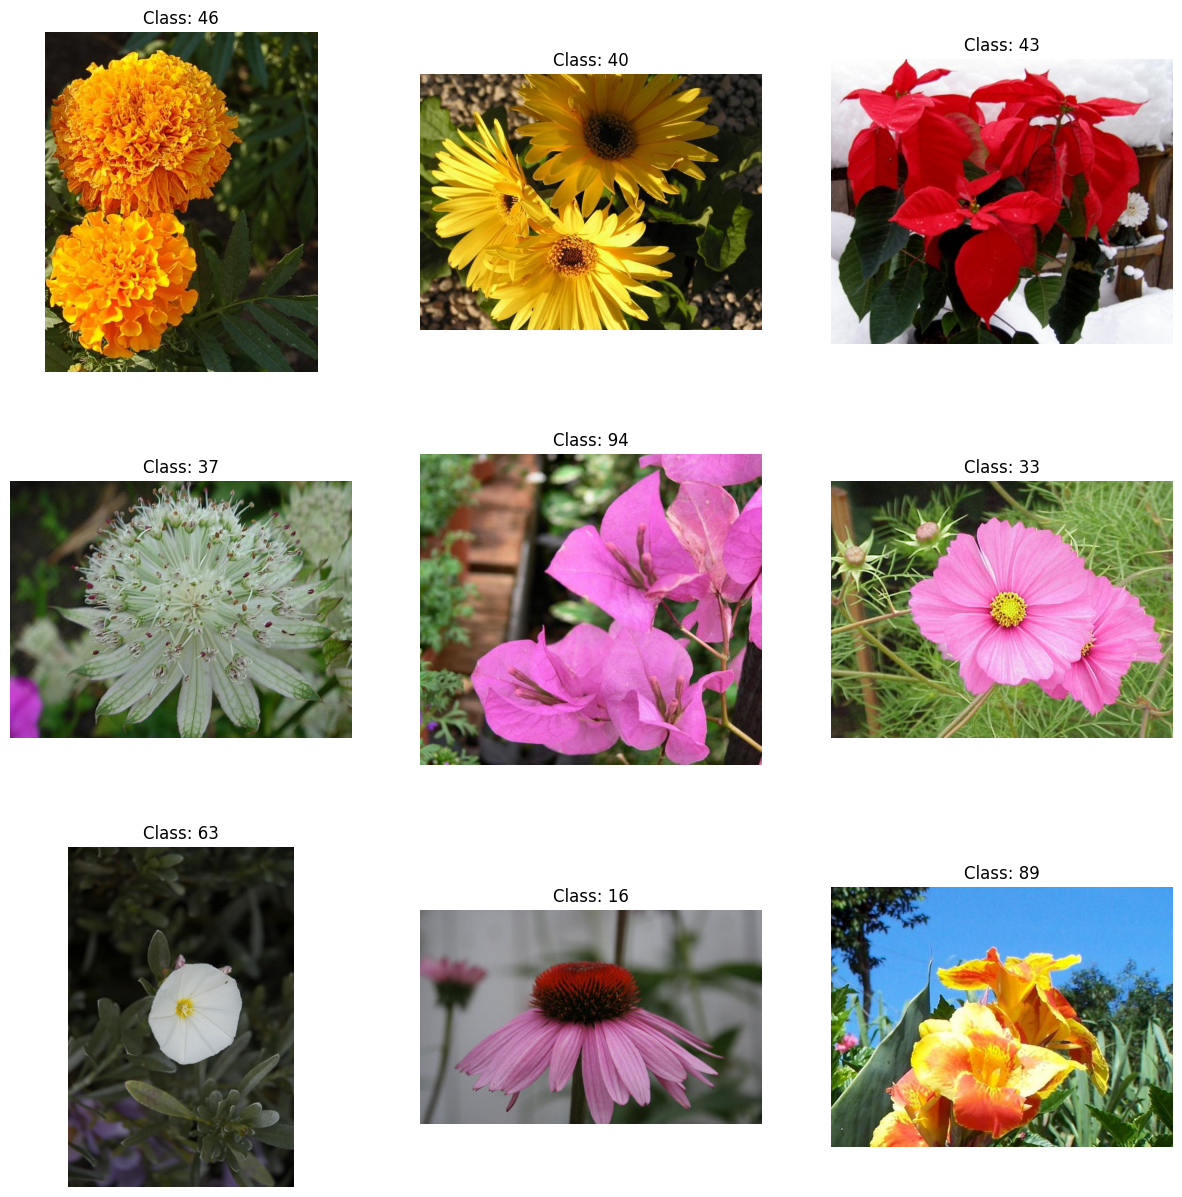

In [5]:
show_samples(dataset)

## Image Dimensions
Let's check the dimensions of a few images to see if they vary.

In [6]:
for i in range(5):
    img, _ = dataset[i]
    print(f"Image {i} shape: {img.size}")

Image 0 shape: (754, 500)
Image 1 shape: (624, 500)
Image 2 shape: (667, 500)
Image 3 shape: (750, 500)
Image 4 shape: (500, 714)
